In [47]:
from gensim.models import Word2Vec
import optuna
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [28]:
# Данный набор данных основан на проведенном опросе, 
# в котором люди оценивали различные показатели своего города по шкале от 1 до 5 и отвечали,
# счастливы ли они или нет.

# Цель этого набора данных состоит в понимании важных факторов,
# которые влияют на уровень счастья жителей города.

# Словарь данных:
# - infoavail (наличие информации о городских службах)
# - housecost (стоимость жилья)
# - schoolquality (общая качество государственных школ)
# - policetrust (доверие к местной полиции)
# - streetquality (состояние улиц и тротуаров)
# - events (наличие социальных мероприятий в сообществе)
# - happy (целевой признак (D) со значениями 0 (несчастливый) и 1 (счастливый))

# Получаем данные

In [29]:
df = pd.read_csv('happydata.csv')
df.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [30]:
df.columns.to_list()

['infoavail',
 'housecost',
 'schoolquality',
 'policetrust',
 'streetquality',
 'ëvents',
 'happy']

# Делим данные

In [31]:
x = df.drop(columns=['happy'])
y = df['happy']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Подбираем гиперпараметры для решаеющего дерева

In [33]:
# Criterion (критерий): 
# Определяет функцию для измерения качества разделения на каждом узле дерева.
# Возможные значения: 'gini' (индекс Джини) или 'entropy' (энтропия).

# Splitter (стратегия выбора разделителя): 
# Определяет стратегию выбора разделителя при разделении узлов. 
# Возможные значения: 'best' (выбирает наилучший разделитель) или 'random' (выбирает случайный разделитель).

# Max Depth (максимальная глубина): 
# Ограничивает максимальную глубину дерева путем ограничения количества уровней узлов. 
# Глубина дерева указывает, сколько разделений или вопросов может задать дерево перед принятием окончательного решения.

# Min Samples Split (минимальное количество примеров для разделения):
# Определяет минимальное количество примеров, необходимых для разделения узла на два подузла.
# Если в узле содержится меньше примеров, чем значение этого параметра, разделение не будет произведено.

# Min Samples Leaf (минимальное количество примеров в листе):
# Определяет минимальное количество примеров, необходимых для формирования листового узла (конечного узла) в дереве.
# Если в узле содержится меньше примеров, чем значение этого параметра, листовой узел не будет создан, и разделение будет прекращено.

# Max Features (максимальное количество признаков):
# Определяет количество признаков, которые необходимо учитывать при каждом разделении узла.
# Возможные значения: 'auto', 'sqrt', 'log2', None.

# Random State (случайное состояние): 
# Устанавливает начальное случайное состояние для воспроизводимости результатов.

# Max Leaf Nodes (максимальное количество листовых узлов): 
# Ограничивает максимальное количество листовых узлов в дереве.

In [36]:
def objective(trial):
    params = {
    "criterion"  :  trial.suggest_categorical('criterion', ['gini', 'entropy']),
    "max_depth"  :  trial.suggest_int('max_depth', 2, 32),
    "min_samples_split"  :  trial.suggest_int('min_samples_split', 2, 10),
    "min_samples_leaf"  :  trial.suggest_int('min_samples_leaf', 1, 10),
    "max_features"  :  trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None]),
    "splitter"  :  trial.suggest_categorical('splitter', ['best', 'random']),
    "max_leaf_nodes"  :  trial.suggest_int('max_leaf_nodes', 2, 32)
    }
    
    model = DecisionTreeClassifier(**params)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    return roc_auc

In [37]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=-1)

[I 2023-05-27 21:25:31,577] A new study created in memory with name: no-name-93aff59f-d100-41b5-9e4e-65723ceba242
[I 2023-05-27 21:25:31,598] Trial 0 finished with value: 0.5619047619047619 and parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'splitter': 'random', 'max_leaf_nodes': 28}. Best is trial 0 with value: 0.5619047619047619.
[I 2023-05-27 21:25:31,635] Trial 1 finished with value: 0.6880952380952382 and parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': None, 'splitter': 'random', 'max_leaf_nodes': 29}. Best is trial 1 with value: 0.6880952380952382.
[I 2023-05-27 21:25:31,656] Trial 2 finished with value: 0.49285714285714277 and parameters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'log2', 'splitter': 'best', 'max_leaf_nodes': 4}. Best is trial 1 with value: 0.6880952380952382.
[

[I 2023-05-27 21:25:32,107] Trial 22 finished with value: 0.48809523809523814 and parameters: {'criterion': 'entropy', 'max_depth': 29, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'random', 'max_leaf_nodes': 10}. Best is trial 7 with value: 0.7642857142857142.
[I 2023-05-27 21:25:32,518] Trial 24 finished with value: 0.7619047619047621 and parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 6, 'max_features': 'log2', 'splitter': 'best', 'max_leaf_nodes': 25}. Best is trial 7 with value: 0.7642857142857142.
[I 2023-05-27 21:25:32,642] Trial 23 finished with value: 0.6238095238095238 and parameters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'log2', 'splitter': 'best', 'max_leaf_nodes': 8}. Best is trial 7 with value: 0.7642857142857142.
[I 2023-05-27 21:25:32,685] Trial 26 finished with value: 0.6928571428571428 and parameters: {'criterion': 'entr

[I 2023-05-27 21:25:34,234] Trial 51 finished with value: 0.5904761904761905 and parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'splitter': 'best', 'max_leaf_nodes': 13}. Best is trial 7 with value: 0.7642857142857142.
[I 2023-05-27 21:25:34,246] Trial 49 finished with value: 0.7595238095238095 and parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'splitter': 'best', 'max_leaf_nodes': 13}. Best is trial 7 with value: 0.7642857142857142.
[I 2023-05-27 21:25:34,305] Trial 50 finished with value: 0.5571428571428572 and parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'splitter': 'best', 'max_leaf_nodes': 13}. Best is trial 7 with value: 0.7642857142857142.
[I 2023-05-27 21:25:34,335] Trial 53 finished with value: 0.6619047619047619 and parameters: {'criterion': 'gini', 'max_d

[I 2023-05-27 21:25:35,816] Trial 76 finished with value: 0.4571428571428572 and parameters: {'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'splitter': 'best', 'max_leaf_nodes': 9}. Best is trial 7 with value: 0.7642857142857142.
[I 2023-05-27 21:25:35,860] Trial 73 finished with value: 0.6571428571428573 and parameters: {'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2', 'splitter': 'best', 'max_leaf_nodes': 9}. Best is trial 7 with value: 0.7642857142857142.
[I 2023-05-27 21:25:35,955] Trial 78 finished with value: 0.48809523809523814 and parameters: {'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'splitter': 'best', 'max_leaf_nodes': 9}. Best is trial 7 with value: 0.7642857142857142.
[I 2023-05-27 21:25:36,024] Trial 77 finished with value: 0.6261904761904762 and parameters: {'criterion': 'gini', 'max_

In [38]:
print('Лучшая точность:', study.best_value)
print('Лучшие гиперпараметры:', study.best_params)

Лучшая точность: 0.7642857142857142
Лучшие гиперпараметры: {'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2', 'splitter': 'best', 'max_leaf_nodes': 10}


# Подставляем лучшие параметры

In [40]:
model = DecisionTreeClassifier(**study.best_params)

In [42]:
model.fit(x_train, y_train)    
y_pred = model.predict(x_test)

In [43]:
model.score(x_test, y_test)

0.5862068965517241

# Отрисовка

[Text(0.2916666666666667, 0.9285714285714286, 'x[4] <= 1.5\ngini = 0.494\nsamples = 114\nvalue = [51, 63]'),
 Text(0.20833333333333334, 0.7857142857142857, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.375, 0.7857142857142857, 'x[5] <= 3.5\ngini = 0.487\nsamples = 107\nvalue = [45, 62]'),
 Text(0.16666666666666666, 0.6428571428571429, 'x[0] <= 4.5\ngini = 0.415\nsamples = 17\nvalue = [12, 5]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.25, 0.5, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.5833333333333334, 0.6428571428571429, 'x[2] <= 3.5\ngini = 0.464\nsamples = 90\nvalue = [33, 57]'),
 Text(0.4166666666666667, 0.5, 'x[4] <= 3.5\ngini = 0.483\nsamples = 54\nvalue = [22, 32]'),
 Text(0.3333333333333333, 0.35714285714285715, 'x[0] <= 4.5\ngini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.4166666666666667, 0.21428571428571427, 'x[1] <= 2.5\ngin

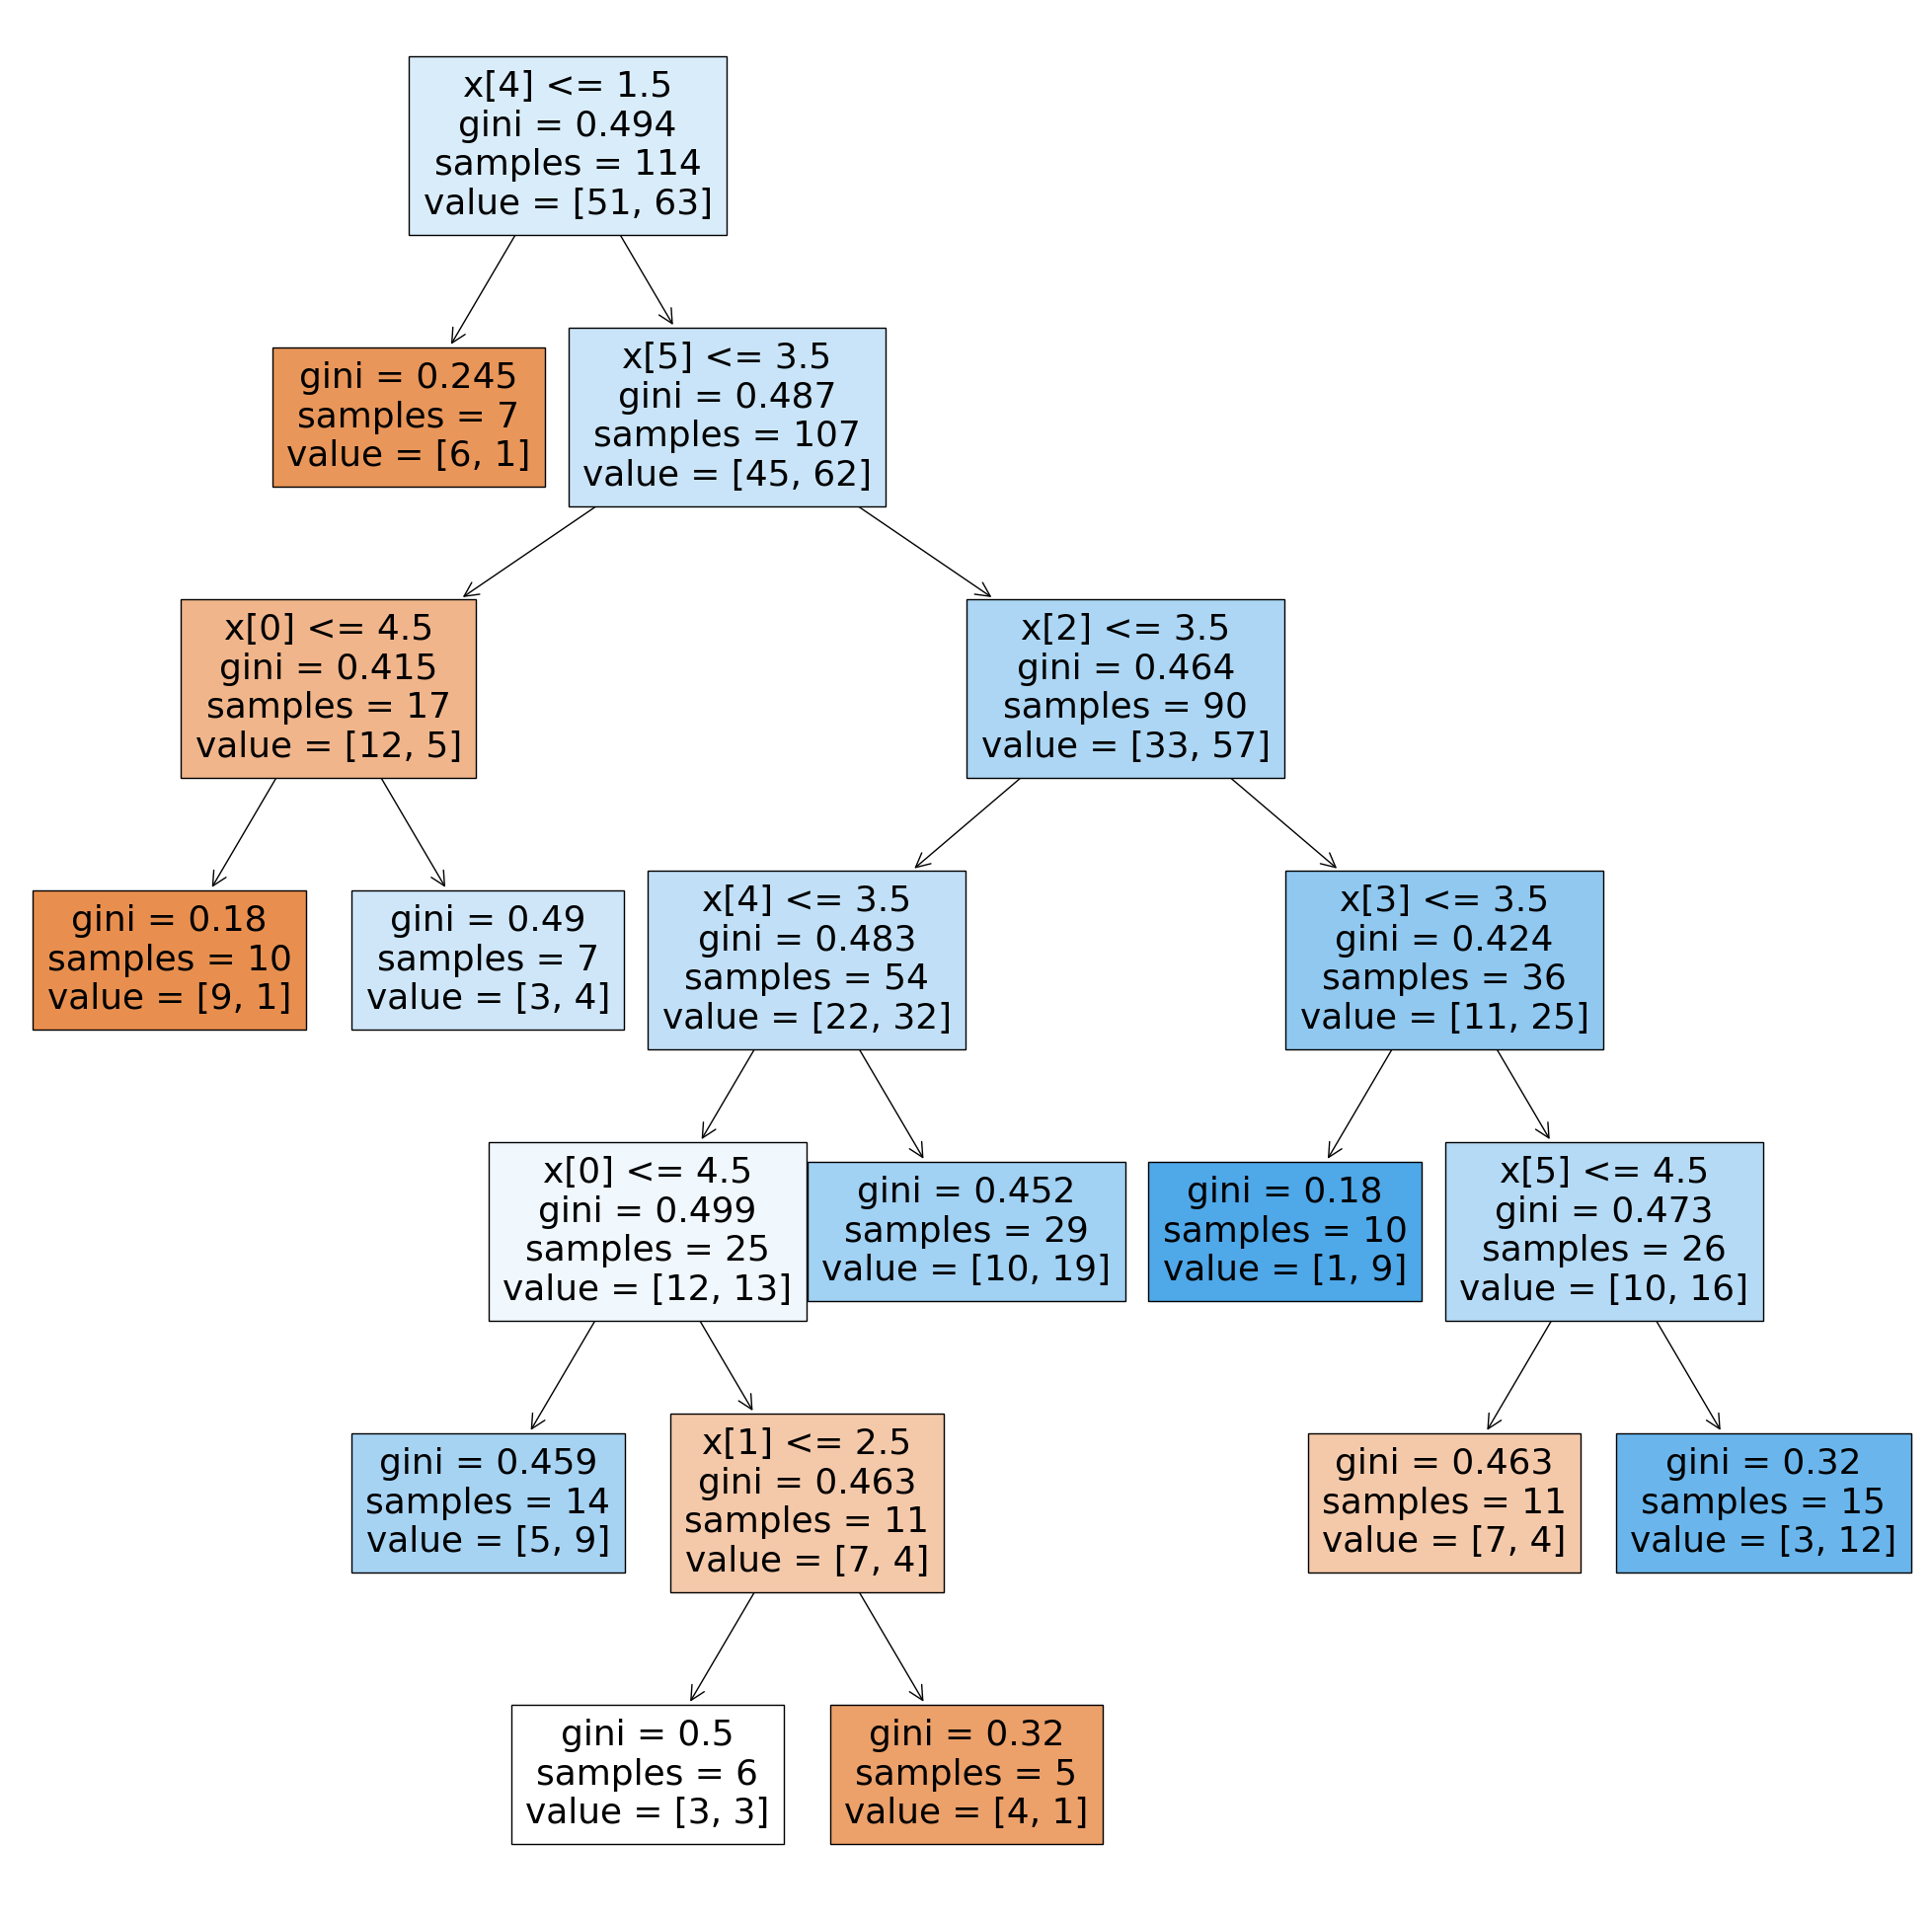

In [46]:
from sklearn import tree

plt.figure(figsize=(25,25))
tree.plot_tree(model, filled=True)

# Кроссвалидация

In [49]:
cross_val_train = cross_val_score(model, x_train, y_train, cv=5)
cross_val_train

array([0.56521739, 0.60869565, 0.69565217, 0.52173913, 0.63636364])

In [50]:
cross_val_train.mean()

0.6055335968379446